<a href="https://colab.research.google.com/github/fatihgumuss/machine-learning-and-nlp/blob/main/mnist_simple_ann_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network backpropagation algorithm  assignment  

Complete implementation of neural network learning algorithm - replace None statement with code.

Neural Network architecture:
- two  layers
- you can freely set the number of neurons in hidden layer  (shape of W1, and consequently W2).

In [ ]:

import numpy as np # linear algebra
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()



11490434/11490434 [==============================] - 1s 0us/step


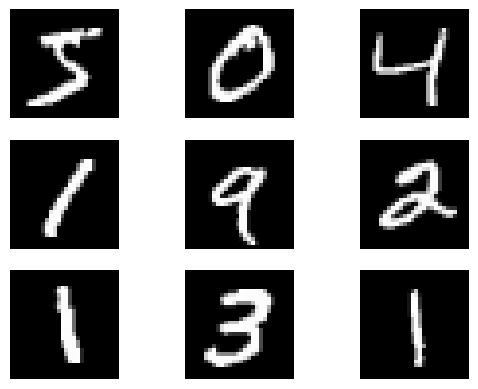

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis("off")

In [ ]:
X_train[0]

(784,)

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train/255.0
X_test = X_test/255.0

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)

X_train.shape (60000, 784)
X_test.shape (10000, 784)


##### Necessary Fuctions for Gradient Descent

In [ ]:
def init_params():
    # TODO: initialize weight with np.random.normal
    W1 = None
    b1 = None
    W2 = None
    b2 = None
    return W1, b1, W2, b2

def RelU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp = np.exp(Z - np.max(Z))
    return exp / exp.sum(axis=0)



def forward_prop(W1, b1, W2, b2, X):
    Z1 = None
    A1 = None
    Z2 = None
    A2 = None
    return Z1, A1, Z2, A2


def one_hot(Y):
    #TODO: implement one-hot encoding function 5 -> [0 0 0 0 0 1 0 0 0 0]   8 - > [0 0 0 0 0 0 0 0  0 1 0]
    one_hot_Y =  None
    return one_hot_Y

def deriv_Relu(Z):
    return Z>0

def back_prop(Z1, A1, Z2, A2, W2, X, Y, loss):


    #convert Y to one-hot encoding
    one_hot_Y = None
    #calculate loss and append to global variable loss
    loss_value = None
    loss.append( loss_value )


    dZ2 = None

    dW2 = None

    db2 = None

    dZ1 = None

    dW1 = None

    db1 = None

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):

    W1 = None
    b1 = None
    W2 = None
    b2 = None

    return W1, b1, W2, b2


In [ ]:
def get_predictions(A2):
    return np.argmax(A2,0)

def  get_accuracy(predictions, Y):
    print(predictions, Y)

    return np.sum(predictions==Y)/Y.size

def gradient_descent(X, Y, iterations, alpha, loss, ite):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y, loss)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        ite.append(i)
        if(i%10==0):
            print(f"iteration:{i}")
            print("Accuracy", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2


In [ ]:
loss = []
ite = []
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 200, 0.5, loss, ite)

Test prediction on single image from  dataset

In [ ]:
sample_input_X = None
_, _, _, A2 = forward_prop(W1, b1, W2, b2, sample_input_X)

In [ ]:
A2

array([[8.89775847e-01],
       [4.84702206e-09],
       [1.73522761e-02],
       [5.67026021e-04],
       [6.53062924e-03],
       [2.39604493e-02],
       [1.41693505e-02],
       [1.88852555e-03],
       [1.89004947e-02],
       [2.68553964e-02]])

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = None
    prediction = None
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


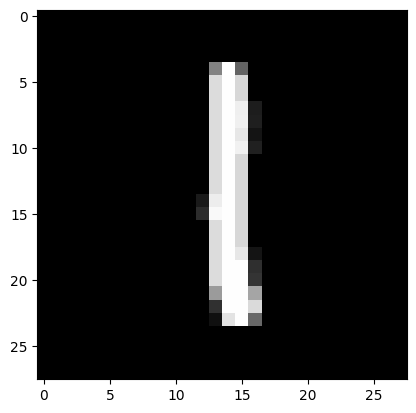

Prediction:  [3]
Label:  3


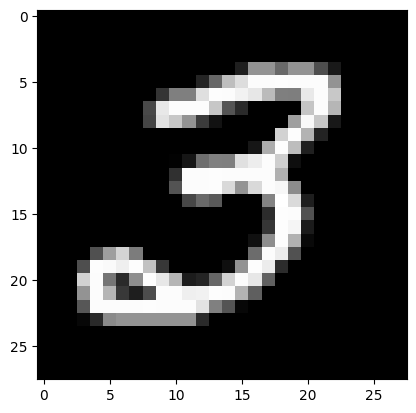

Prediction:  [7]
Label:  7


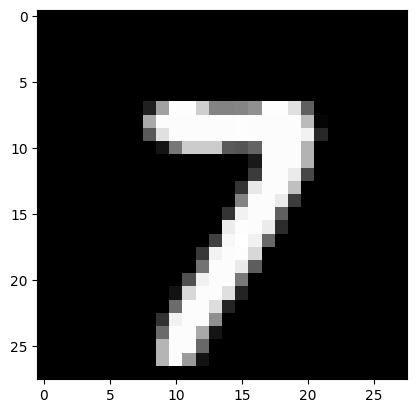

Prediction:  [5]
Label:  5


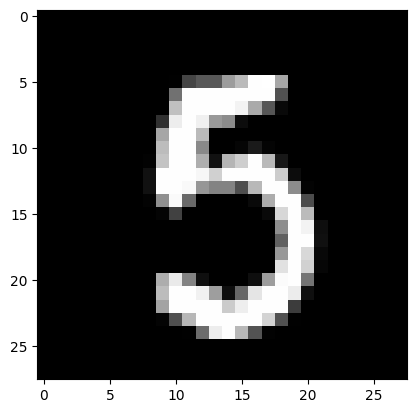

In [ ]:
test_prediction(2, W1, b1, W2, b2)
test_prediction(13, W1, b1, W2, b2)
test_prediction(143, W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)

In [ ]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

accuracy is approx 91%, meaning model works well and is properly generalized...

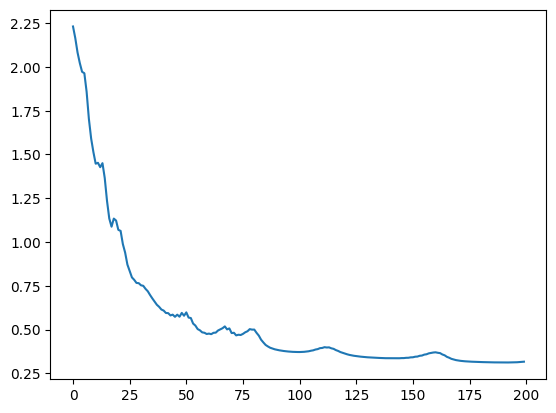

In [ ]:
plt.plot(ite, loss)